# Walmart Weekly Sales Prediction

# Importing the necessary packages


In [5]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Opening the CSV files and converting them to dataframes for further operations

In [7]:
train = pd.read_csv('C:\jupyterfiles/train.csv')
features = pd.read_csv('C:\jupyterfiles/features.csv')
stores = pd.read_csv('C:\jupyterfiles/stores.csv')

In [8]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


# Merging the train, features and stores data and further splitting the merged file for training and validation

In [13]:
train_m1 = train.merge(features, on=['Store','Date','IsHoliday'],how='left').fillna(0)
train_merge = train_m1.merge(stores, on=['Store'], how='left').fillna(0)
train_data = train_merge.head(len(train_merge) - 450)
#The last 450 rows of data are split off into a validation dataset
train_validate = train_merge.tail(450)

In [14]:
train_data

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421115,45,94,2012-03-23,12.72,False,59.45,3.900,6296.25,334.42,4.56,873.47,1201.57,190.536321,8.424,B,118221
421116,45,94,2012-03-30,1270.75,False,50.04,3.953,9866.15,206.18,3.25,1815.37,1561.56,190.610746,8.424,B,118221
421117,45,94,2012-04-06,2853.87,False,49.73,3.996,13450.45,0.00,26.59,3363.54,3962.01,190.685171,8.567,B,118221
421118,45,94,2012-04-13,2863.76,False,51.83,4.044,4736.94,6047.12,16.68,1355.11,2246.12,190.759596,8.567,B,118221


# The merged data is cleaned and prepared for the training models further below¶

In [15]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Week'] = train_data['Date'].dt.week
train_data['YearWeek'] = train_data.Year.astype(str).str.cat(train_data.Week.astype(str))
train_data.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
train_data['YearWeek'] = train_data.YearWeek.astype(int)
train_data = pd.get_dummies(train_data)
train_data

C:\Users\abdul rahman\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\abdul rahman\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\abdul rahman\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C
0,1,1,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,151315,20105,1,0,0
1,1,1,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,151315,20106,1,0,0
2,1,1,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,151315,20107,1,0,0
3,1,1,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,151315,20108,1,0,0
4,1,1,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,151315,20109,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421115,45,94,12.72,False,59.45,3.900,6296.25,334.42,4.56,873.47,1201.57,190.536321,8.424,118221,201212,0,1,0
421116,45,94,1270.75,False,50.04,3.953,9866.15,206.18,3.25,1815.37,1561.56,190.610746,8.424,118221,201213,0,1,0
421117,45,94,2853.87,False,49.73,3.996,13450.45,0.00,26.59,3363.54,3962.01,190.685171,8.567,118221,201214,0,1,0
421118,45,94,2863.76,False,51.83,4.044,4736.94,6047.12,16.68,1355.11,2246.12,190.759596,8.567,118221,201215,0,1,0


# Data is split so as to train and validate the models. The split is 82% - train, 18% - test.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = targets = labels = train_data["Weekly_Sales"].values

columns = ["Store", "Dept", "YearWeek", "IsHoliday", "CPI", "Unemployment", "Size", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features = train_data[list(columns)].values
features
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.18, random_state=1)

# Explore four different models and determine the best model for the prediction

# 1.Gradient Boosting Regressor

In [21]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Scoring the Gradient Boosting Regressor

In [22]:
gbr.score(X_test, y_test)

0.7414631959871238

# 2.Random Forest Regressor

In [23]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Scoring the Random Forest Regressor 

In [24]:
rfr.score(X_test, y_test)

0.9615581561229517

# 3.Linear Regression

In [25]:

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Scoring the Linear Regressor

In [26]:
linreg.score(X_test, y_test)

0.09171247456318021

# 4.BayesianRidge

In [27]:

bayreg = BayesianRidge(compute_score=True)
bayreg.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None, compute_score=True,
              copy_X=True, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06,
              lambda_init=None, n_iter=300, normalize=False, tol=0.001,
              verbose=False)

# Scoring the BayesianRidge

In [28]:
bayreg.score(X_test, y_test)

0.09170504000886026

# Based on above four models
  **Gradient Boosting Regressor-74%**
  **Random Forest Regressor-96%**
  **Linear Regressor-9%**
  **BayesianRidge-9%**

In [19]:
from matplotlib import pyplot as plt

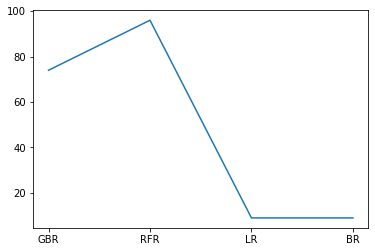

In [20]:
x=['GBR','RFR','LR','BR']
y=[74,96,9,9]
plt.plot(x,y)
plt.show()

# Random Forest Regressor is found to have the best accuracy with optimal time to build the model

# Prepare the validation dataset data. 

In [29]:
train_validate['Date'] = pd.to_datetime(train_validate['Date'])
train_validate['Year'] = train_validate['Date'].dt.year
train_validate['Week'] = train_validate['Date'].dt.week
train_validate['YearWeek'] = train_validate.Year.astype(str).str.cat(train_validate.Week.astype(str))
train_validate.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
train_validate['YearWeek'] = train_validate.YearWeek.astype(int)
train_validate = pd.get_dummies(train_validate)
train_validate['Type_A'] = 0
train_validate['Type_C'] = 0
train_validate

C:\Users\abdul rahman\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\abdul rahman\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\abdul rahman\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_B,Type_A,Type_C
421120,45,94,3109.40,False,53.20,4.004,2872.86,0.03,37.12,74.97,2495.29,190.868006,8.567,118221,201217,1,0,0
421121,45,94,3123.83,False,55.21,3.951,11984.62,0.00,47.52,6150.63,1775.54,190.922212,8.567,118221,201218,1,0,0
421122,45,94,3800.78,False,61.24,3.889,12611.18,0.00,21.36,1667.39,2313.12,190.976417,8.567,118221,201219,1,0,0
421123,45,94,5918.72,False,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,118221,201220,1,0,0
421124,45,94,2878.50,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,118221,201221,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,201239,1,0,0
421566,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,118221,201240,1,0,0
421567,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,118221,201241,1,0,0
421568,45,98,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,118221,201242,1,0,0


# Mark out columns from the validate dataset that would be fed to the predictor model

In [30]:
columns2 = ["Store", "Dept", "YearWeek", "IsHoliday", "CPI", "Unemployment", "Size", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features_validate = train_validate[list(columns2)].values
features_validate

array([[45, 94, 201217, ..., 0, 1, 0],
       [45, 94, 201218, ..., 0, 1, 0],
       [45, 94, 201219, ..., 0, 1, 0],
       ...,
       [45, 98, 201241, ..., 0, 1, 0],
       [45, 98, 201242, ..., 0, 1, 0],
       [45, 98, 201243, ..., 0, 1, 0]], dtype=object)

# Execute the model on the validate dataset and see the predictions

In [31]:

pred_vals = rfr.predict(features_validate)

# Suffix the predicted column to the validation dataset so that we can do a comparison and assess the efficacy of the model

In [33]:
train_validate['Predicted'] = pred_vals
train_validate

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_B,Type_A,Type_C,Predicted
421120,45,94,3109.40,False,53.20,4.004,2872.86,0.03,37.12,74.97,2495.29,190.868006,8.567,118221,201217,1,0,0,2764.8561
421121,45,94,3123.83,False,55.21,3.951,11984.62,0.00,47.52,6150.63,1775.54,190.922212,8.567,118221,201218,1,0,0,2276.6686
421122,45,94,3800.78,False,61.24,3.889,12611.18,0.00,21.36,1667.39,2313.12,190.976417,8.567,118221,201219,1,0,0,2550.9399
421123,45,94,5918.72,False,66.30,3.848,6813.74,0.00,13.86,936.49,2941.55,190.996448,8.567,118221,201220,1,0,0,2693.2629
421124,45,94,2878.50,False,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,118221,201221,1,0,0,2723.4435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,118221,201239,1,0,0,364.2730
421566,45,98,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,118221,201240,1,0,0,355.4885
421567,45,98,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,118221,201241,1,0,0,455.4495
421568,45,98,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,118221,201242,1,0,0,484.6065


In [34]:
train_validate.drop(['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'YearWeek', 'Type_B', 'Type_A', 'Type_C'], axis=1, inplace=True)
train_validate

,Store,Dept,Weekly_Sales,IsHoliday,Predicted
421120,45,94,3109.40,False,2764.8561
421121,45,94,3123.83,False,2276.6686
421122,45,94,3800.78,False,2550.9399
421123,45,94,5918.72,False,2693.2629
421124,45,94,2878.50,False,2723.4435
...,...,...,...,...,...
421565,45,98,508.37,False,364.2730
421566,45,98,628.10,False,355.4885
421567,45,98,1061.02,False,455.4495
421568,45,98,760.01,False,484.6065


# Prepare the test dataset to run it by the model. Merge the test data with the features and stores data

In [35]:
test = pd.read_csv('C:\jupyterfiles/test.csv')
features = pd.read_csv('C:\jupyterfiles/features.csv')
stores = pd.read_csv('C:\jupyterfiles/stores.csv')
test_m1 = test.merge(features, on=['Store','Date','IsHoliday'],how='left').fillna(0)
test_merge = test_m1.merge(stores, on=['Store'], how='left').fillna(0)

# The date variable is manipulated for further assessment. The entire dataset is normalized

In [36]:
test_merge['Date'] = pd.to_datetime(test_merge['Date'])
test_merge['Year'] = test_merge['Date'].dt.year
test_merge['Week'] = test_merge['Date'].dt.week
test_merge['YearWeek'] = test_merge.Year.astype(str).str.cat(test_merge.Week.astype(str))
test_merge.drop(['Date', 'Year', 'Week'], axis=1, inplace=True)
test_merge['YearWeek'] = test_merge.YearWeek.astype(int)
test_merge = pd.get_dummies(test_merge)
test_merge

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,201244,1,0,0
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,201245,1,0,0
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,201246,1,0,0
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,201247,1,0,0
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,201248,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,118221,201326,0,1,0
115060,45,98,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,118221,201327,0,1,0
115061,45,98,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,118221,201328,0,1,0
115062,45,98,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,118221,201329,0,1,0


# Columns from the test dataset that would be used by the trained model to make a prediction of the target labels

In [37]:
columns3 =  ["Store", "Dept", "YearWeek", "IsHoliday", "Size", "Unemployment", "CPI", "Temperature", "Fuel_Price", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Type_A", "Type_B", "Type_C"]
features_test = test_merge[list(columns2)].values
features_test

array([[1, 1, 201244, ..., 1, 0, 0],
       [1, 1, 201245, ..., 1, 0, 0],
       [1, 1, 201246, ..., 1, 0, 0],
       ...,
       [45, 98, 201328, ..., 0, 1, 0],
       [45, 98, 201329, ..., 0, 1, 0],
       [45, 98, 201330, ..., 0, 1, 0]], dtype=object)

# The actual execution of the trained model on the test dataset. Merge the predictions as a new column to the test dataset

In [38]:
test_vals = rfr.predict(features_test)
test_vals

array([30138.1144, 30330.2769, 29277.3827, ...,   416.2152,   462.2092,
         529.6614])

In [39]:
test_merge['PredictedWeeklySales'] = test_vals
test_merge

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,YearWeek,Type_A,Type_B,Type_C,PredictedWeeklySales
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,201244,1,0,0,30138.1144
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,201245,1,0,0,30330.2769
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,201246,1,0,0,29277.3827
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,201247,1,0,0,48706.9426
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,201248,1,0,0,47972.2367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,118221,201326,0,1,0,419.7928
115060,45,98,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,118221,201327,0,1,0,424.0273
115061,45,98,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,118221,201328,0,1,0,416.2152
115062,45,98,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,118221,201329,0,1,0,462.2092


# We have finally predicted 6 months sales starting from 201244(2012 Oct)-201330(2013 july)

# To do:
   1.Data Visualization